* By: Illya Barziy
* Email: illyabarziy@gmail.com
* Reference: Advances in Financial Machine Learning, Chapter-14

## Chapter 14 Backtest Statistics

## Introduction

Whenever a strategy is created, it's performance has to be tested and reported. This chapter covers some of the statistics that are used for understanding the characteristics of a strategy related to levels of risk and return. It also provides tools to test if the strategy satisfies desired profitability benchmarks (Sharpe ratio in particular). Statistics in this chapter cover the following topics:
- Drawdown
- Time under water
- Herfindahl-Hirschman Index or Concentration of returns
- Sharpe ratio
- Probabilistic Sharpe ratio
- Deflated Sharpe ratio

In this notebook, the exercises from Chapter-14 in the book "Advances in Financial Machine Learning" are implemented.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import mlfinlab.backtest_statistics.statistics as bs



MlFinLab needs you! We need your help for us to keep on maintaining and implementing academic research based on 
financial machine learning (for open-source). In order for us to continue we need to raise $4000 of monthly donations
via Patreon - by December 2020. If we can't reach our goal, we will need to adopt more of a paid for service. We thought
that the best and least impactful course of action (should we not reach our goal) is to leave the package as open-source
but to make the documentation (ReadTheDocs) a paid for service. This is the ultimate litmus test, if the package is a 
value add, then we need the community to help us keep it going.

Our road map for 2020 is to implement the text book: Machine Learning for Asset Managers by Marcos Lopez de Prado, 
as well as a few papers from the Journal of Financial Data Science. We are hiring a full time developer for 3 months 
to help us reach our goals. The money that you, our sponsors, contribute will go directly to paying salarie

## Question-14.1

### A strategy exhibits a high turnover, high leverage, and high number of bets, with a short holding period, low return on execution costs, and a high Sharpe ratio. Is it likely to have large capacity? What kind of strategy do you think it is?

Looking closer to the characteristics:
- A high turnover means that measures the ratio of the average amount traded per year is higher than the average annual assets under management (AUM). It can occur either when either position is often tuned or flipped.
- High leverage means that the amounts borrowed for strategy execution are high compared to AUM.
- The high number of bets occurs when positions are changed frequently. That shows that the strategy certainly doesn't have long holding periods.
- Short holding periods go in line with the previous characteristic.
- low return on execution cases - when the ratio between dollar performance (including brokerage fees and slippage costs) and total execution costs is low, there are high chances that strategy won't survive worse-than-expected execution.
- High Sharpe ratio shows that returns are high and have a relatively low level of volatility

Capacity is defined as the highest AUM that delivers a target risk-adjusted performance. Since the strategy shows high leverage, it isn't likely to have high capacity since a big portion of resources is borrowed.

This results in assuming that this is a High-frequency trading strategy (HFT), that frequently changes its positions and uses big amounts of borrowed resources so that effects from small changes in price are significant. Shore holding periods fit the description, as well as low return on execution costs, as slippage or delays in execution may vanish the profits. The high Sharpe ratio shows that it's successful.

## Question-14.2

### On the dollar bars dataset for E-mini S&P 500 futures, compute
### (a) HHI index on positive returns

#### !!!Note that this notebook uses a full dataset. If one tries to run the notebook on sample data provided in the GitHub repository the results will be different!!!

We assume no transaction costs and the amount invested is the first observed price of a contract

In [2]:
# Read in data
data = pd.read_csv('../Sample-Data/dollar_bars.csv')
data.index = pd.to_datetime(data['date_time'])
data = data.drop('date_time', axis=1)

In [3]:
data

,open,high,low,close,cum_vol,cum_dollar,cum_ticks
date_time,,,,,,,
2011-07-31 23:31:58.810,1306.00,1308.75,1301.75,1305.75,53658,70035704.75,14115
2011-08-01 02:55:17.443,1305.75,1309.50,1304.00,1306.50,53552,70006277.00,15422
2011-08-01 07:25:56.319,1306.75,1309.75,1304.75,1305.00,53543,70000901.00,14727
2011-08-01 08:33:10.903,1305.00,1305.00,1299.00,1300.00,53830,70094217.75,14987
2011-08-01 10:51:41.842,1300.00,1307.75,1299.00,1307.75,53734,70033006.25,14499
...,...,...,...,...,...,...,...
2019-02-01 20:55:01.064,2704.00,2704.00,2700.75,2702.50,25921,70045841.00,4040
2019-02-01 20:59:21.030,2702.50,2705.00,2702.50,2704.75,25890,70006624.75,4172
2019-02-01 20:59:59.015,2704.75,2706.00,2704.50,2704.50,25895,70050302.25,2596


In [4]:
#Transforming data to returns from one long position
data_series = data['close'].diff()[1:]

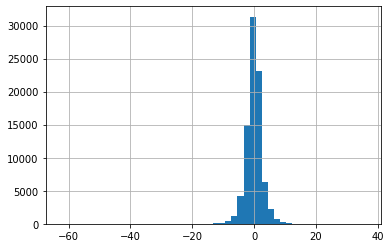

In [5]:
data_series.hist(bins=50)
plt.show()

In [6]:
#Uning mlfinlab package function for detailed concentration output
pos_concentr, neg_concentr, hourly_concentr = bs.all_bets_concentration(data_series, frequency='H')

In [7]:
print('HHI index on positive returns is' , pos_concentr)

HHI index on positive returns is 2.3655213542956836e-05


Concentration (or HHI index) on positive returns is fairly close to zero. From its properties we can conclude that the returns distribution is likely not to have a fat right tail.

### (b) HHI index on negative returns.

In [8]:
print('HHI index on negative returns is' , neg_concentr)

HHI index on negative returns is 2.2954740788327176e-05


Concentration (or HHI index) on negative returns is fairly close to zero, the same as for positive ones. From its properties, we can conclude that the returns distribution is likely not to have a fat left tail.

### (c) HHI index on time between bars

In [9]:
print('HHI index on returns divided by hourly bins is' , hourly_concentr)

HHI index on returns divided by hourly bins is 5.438411110913481e-05


Concentration (or HHI index) on time between bars (from the observed dataset, roughly 1h between bars) is low. This means bets are not concentrated in time or are close to uniformly distributed across time.

### (d) The 95-percentile DD

In [10]:
#Getting series of prices to represent value of one long portfolio
price_series = data['close'][1:]

In [11]:
#Uning mlfinlab package function to get drawdowns and time under water series
drawdown, tuw = bs.drawdown_and_time_under_water(price_series, dollars = False)
drawdown_dollars, _ = bs.drawdown_and_time_under_water(price_series, dollars = True)

In [12]:
print('The 95th percentile of Drawdown is' , drawdown.quantile(.95))

The 95th percentile of Drawdown is 0.01769512497257557


In [13]:
print('The 95th percentile of Drawdown in dollars is' , drawdown_dollars.quantile(.95))

The 95th percentile of Drawdown in dollars is 34.912499999999966


This means that from the observed set, 95% of drawdowns are below 0,018 or 1,8% of the portfolio (If assuming long position). In dollar equivalent, it is \$34,91.

### (e) The 95-percentile TuW

In [14]:
print('The 95th percentile of Time under water' , tuw.quantile(.95))

The 95th percentile of Time under water 0.029103712246987646


From the results, 95% of the time under water is below 0,029 years, or 10,62 days.

### (f) Annualized average return.

In [15]:
# Using simple formula for annual return calculation
days_observed = (price_series.index[-1] - price_series.index[0]) / np.timedelta64(1, 'D')
cumulated_return = price_series[-1]/price_series[0]
annual_return = (cumulated_return)**(365/days_observed) - 1

In [16]:
print('Annualized average return from data is' , annual_return)

Annualized average return from data is 0.10169027020627053


So, the average annual return from the given data is 10,169%

### (g) Average returns from hits (positive returns).

In [17]:
print('Average returns from positive bars in dollars is' , data_series[data_series>0].mean(), 
      'and counter is', data_series[data_series>0].count())

#Also looking at returns grouped by days
returns_by_days = data_series.groupby(pd.Grouper(freq='D')).sum()
returns_by_days = returns_by_days[returns_by_days!=0]
print('Average returns from positive bars grouped by days in dollars is' , 
      returns_by_days[returns_by_days>0].mean(), 'and counter is', 
      returns_by_days[returns_by_days>0].count())

Average returns from positive bars in dollars is 1.9492611434108527 and counter is 41280
Average returns from positive bars grouped by days in dollars is 11.35787824529991 and counter is 1117


Average return from bar hits is 1,9492 and from day hits 11,358. Hits from bars are 37 times more frequent than daily hits.

### (h) Average return from misses (negative returns).

In [18]:
print('Average returns from negative bars in dollars is' , data_series[data_series<0].mean(),
     'and counter is', data_series[data_series<0].count())

print('Average returns from negative bars grouped by days in dollars is' , 
      returns_by_days[returns_by_days<0].mean(), 'and counter is',
      returns_by_days[returns_by_days<0].count())

Average returns from negative bars in dollars is -1.987007438681142 and counter is 39792
Average returns from negative bars grouped by days in dollars is -11.8698738170347 and counter is 951


Average return from bar misses are -1,987 and from day hits -11,869. The number of misses is just slightly (3,6%) lower than the number of hits.

### (i) Annualized SR

In [19]:
#Uning mlfinlab package function to get SR
annualized_sr = bs.sharpe_ratio(returns_by_days, cumulative=False, entries_per_year=252, risk_free_rate=0)
print('Annualized Sharpe Ratio (with risk-free rate assumed to be zero) is' , annualized_sr)

Annualized Sharpe Ratio (with risk-free rate assumed to be zero) is 0.6310107813250395


The annualized Sharpe ratio for the long position on the portfolio is fairly low at 0,631.

### (j) Information ratio, where the benchmark is the risk-free rate.

Information ratio is the relation of mean excess return over a benchmark to the standard deviation of that excess return over a benchmark.

For the benchmark, let's assume the risk-free rate to be the 10-year treasury rate at the beginning of 2020 at 1,8% per year

In [20]:
#Stating the risk-free ratio and trading days per year
risk_free_ratio = 0.018
trading_days = 252
#Getting returns in percentages as a daily return divided by the starting price of the day
open_by_days = data['close'].groupby(pd.Grouper(freq='D')).first().dropna()
percentage_returns = returns_by_days / open_by_days[1:]

#Calculating excess returns above the risk-free ratio
excess_returns = percentage_returns - risk_free_ratio / trading_days

#Now, for the calculation of the Inforamtion ratio, a Sharpe ratio function can be used
#with zero risk-free rate parameter.
information_ratio = bs.sharpe_ratio(excess_returns, cumulative=False, 
                                    entries_per_year=trading_days, risk_free_rate=0)
print('Information ratio (with risk-free rate assumed to be 1.8%) is' , information_ratio)

Information ratio (with risk-free rate assumed to be 1.8%) is 0.5544851775525051


Information ratio is the Sharpe ratio equivalent of a portfolio that measures its performance relative to a benchmark. It is lower than the Sharpe ratio, as expected, as we're measuring the relative performance of a portfolio. It is still positive, which means that the portfolio outperforms the benchmark of a risk-free rate.

### (k) PSR.

The probabilistic Sharpe ratio (PSR) provides an adjusted estimate of SR, by removing the inflationary effect caused by short series with skewed and/or fat-tailed returns.

As no benchmark Sharpe ratio is provided, let's assume it to be at 0,6, a bit lower than the previously calculated Annual SR.

In [21]:
#Uning mlfinlab package function to get PSR
probabalistic_sr = bs.probabalistic_sharpe_ratio(observed_sr=annualized_sr, 
                                                 benchmark_sr=0.6, 
                                                 number_of_returns=days_observed, 
                                                 skewness_of_returns=returns_by_days.skew(), 
                                                 kurtosis_of_returns=returns_by_days.kurt())
print('Probabalistic Sharpe Ratio with benchmark SR of 0.6 is' , probabalistic_sr)

Probabalistic Sharpe Ratio with benchmark SR of 0.6 is 0.8827827886729662


As the PSR value is lower than 0.95, we have to reject the hypothesis that the Sharpe ratio is 0,6 for the 5% significance level.

In [22]:
probabalistic_sr_adj = bs.probabalistic_sharpe_ratio(observed_sr=annualized_sr, 
                                                     benchmark_sr=0.588, 
                                                     number_of_returns=days_observed, 
                                                     skewness_of_returns=returns_by_days.skew(), 
                                                     kurtosis_of_returns=returns_by_days.kurt())
print('Probabalistic Sharpe Ratio with benchmark SR of 0.588 is' , probabalistic_sr_adj)

Probabalistic Sharpe Ratio with benchmark SR of 0.588 is 0.9504381184707785


However, with the benchmark SR of 0,588, the PSR is just above 0,95. So, we can assume Sharpe ratio to be 0,588 for the 5% significance level.

### (l) DSR, where we assume there were 100 trials, and the variance of the trials’ SR was 0,5.

Deflated Sharpe Ratio (DSR) is a PSR where the rejection threshold is adjusted to reflect the multiplicity of trials. DSR is estimated as PSR[SR∗], where the benchmark Sharpe ratio, SR∗, is no longer user-defined but calculated from SR estimate trails.

Taking 0,588 as a benchmark Sharpe ratio.

In [23]:
#As the current function accepts only lists of trails, let's generate one and pass it as a parameter.
trails_list = np.random.normal(0.588, 0.5**(1/2), 100)

#Uning mlfinlab package function to get DSR
deflated_sr = bs.deflated_sharpe_ratio(observed_sr=annualized_sr, 
                                       sr_estimates=trails_list, 
                                       number_of_returns=days_observed, 
                                       skewness_of_returns=returns_by_days.skew(), 
                                       kurtosis_of_returns=returns_by_days.kurt())
print('Deflated Sharpe Ratio with benchmark SR of 0.588 and 100 trails is' , deflated_sr)

Deflated Sharpe Ratio with benchmark SR of 0.588 and 100 trails is 0.0


The Deflated Sharpe ratio is extremely low. This is because the benchmark in the estimate is set high:

In [24]:
benchmark_sr_dsr = np.array(trails_list).std() * \
                   ((1 - np.euler_gamma) * ss.norm.ppf(1 - 1 / len(trails_list)) +
                    np.euler_gamma * ss.norm.ppf(1 - 1 / len(trails_list) * np.e ** (-1)))

print('Benchmark Sharpe ratio used in DSR is' , benchmark_sr_dsr)

Benchmark Sharpe ratio used in DSR is 1.8110747841360078


If the number of trails was smaller, the results would be different:

In [25]:
trails_list_adj = np.random.normal(0.588, 0.5**(1/2), 3)

benchmark_sr_dsr_adj = np.array(trails_list_adj).std() * \
                       ((1 - np.euler_gamma) * ss.norm.ppf(1 - 1 / len(trails_list_adj)) +
                       np.euler_gamma * ss.norm.ppf(1 - 1 / len(trails_list_adj) * np.e ** (-1)))

print('Benchmark Sharpe ratio if number of trails is decreased to 3 is' , benchmark_sr_dsr_adj)

deflated_sr = bs.deflated_sharpe_ratio(observed_sr=annualized_sr, 
                                       sr_estimates=trails_list_adj, 
                                       number_of_returns=days_observed, 
                                       skewness_of_returns=returns_by_days.skew(), 
                                       kurtosis_of_returns=returns_by_days.kurt())
print('Deflated Sharpe Ratio with benchmark SR of 0.588 and 3 trails is' , deflated_sr)

Benchmark Sharpe ratio if number of trails is decreased to 3 is 0.45179677796543233
Deflated Sharpe Ratio with benchmark SR of 0.588 and 3 trails is 0.9999999999968215


## Question-14.3

### Consider a strategy that is long one futures contract on even years, and is short one futures contract on odd years.

### (a) Repeat the calculations from exercise 2.

We assume no transaction costs and the amount invested is the first observed price of a contract

In [26]:
# To change the existing series of returns from one long position to the one 
# described above, we multiply odd years entries by -1.
data_series_with_short = data_series *(1 - 2 * (data_series.index.year % 2))

# And use cumulative sum plus price of a contract to get series with the
# price of a portfolio
price_series_with_short = data_series_with_short.cumsum() + price_series[0]

### _Distribution of returns._

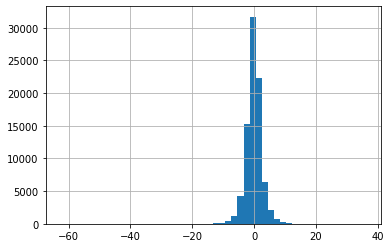

In [27]:
data_series_with_short.hist(bins=50)
plt.show()

On the histogram the distribution looks about the same as the previous one

### _Positive, negative and time concentrations (or HHI)._

In [28]:
pos_concentr, neg_concentr, hourly_concentr = bs.all_bets_concentration(data_series_with_short, frequency='H')
print('HHI index of positive returns is' , pos_concentr)
print('HHI index of negative returns is' , neg_concentr)
print('HHI index of returns divided by hourly bins is' , hourly_concentr)

HHI index of positive returns is 2.4642042048749166e-05
HHI index of negative returns is 2.2040609472958242e-05
HHI index of returns divided by hourly bins is 5.438411110913481e-05


The concentration of positive returns slightly increased, while the concentration of negative decreased. This would mean that the distribution is now less likely to have left fat tail and more likely to have a fat right tail.

Concentration in time is exactly the same, as the returns occur wit the same previously as in the previous portfolio.

### _Drawdown and Time under water 95th percentile._

In [29]:
#Uning mlfinlab package function to get drawdowns and time under water series
drawdown, tuw = bs.drawdown_and_time_under_water(price_series_with_short, dollars = False)
drawdown_dollars, _ = bs.drawdown_and_time_under_water(price_series_with_short, dollars = True)

In [30]:
print('The 95th percentile of Drawdown is' , drawdown.quantile(.95))

The 95th percentile of Drawdown is 0.045571358374453794


In [31]:
print('The 95th percentile of Drawdown in dollars is' , drawdown_dollars.quantile(.95))

The 95th percentile of Drawdown in dollars is 67.69999999999955


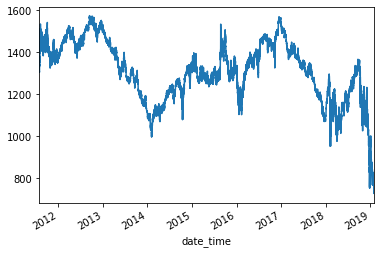

In [32]:
price_series_with_short.plot()
plt.show()

The results show that the 95th percentile is 4,5%. However, the portfolio from the starting value of 1305.75 decreased up to 376.00. Why is that?

It's because we had many small drawdowns in the period of 2011.08-2012.09. In 2012.09 one can observe a peak. Since that time, there was one big drawdown up till the last day. Therefore, quantile measure here is not informative, as we have a set of small drawdowns and a 1 huge outlier at the end of the time period - 53,9%.

In [33]:
print('Maximum Drawdown is', max(drawdown))

Maximum Drawdown is 0.5394507064613431


The same situation is therefore observed with the Time under water

In [34]:
print('The 95th percentile of Time under water' , tuw.quantile(.95))

The 95th percentile of Time under water 0.008642622868013362


### _Annualized average return._

In [35]:
cumulated_return_with_short = price_series_with_short[-1]/price_series_with_short[0]
annual_return = (cumulated_return_with_short)**(365/days_observed) - 1

In [36]:
print('Annualized average return from the portfolio is' , annual_return)

Annualized average return from the portfolio is -0.07348176619176383


The average annual return is negative. It is expected after we saw the plot of portfolio value.

### _Average returns from hits (positive returns)._

In [37]:
print('Average returns from positive bars in dollars is' , 
      data_series_with_short[data_series_with_short>0].mean(), 
      'and counter is', 
      data_series_with_short[data_series_with_short>0].count())

#Also looking at results grouped by days
returns_by_days = data_series_with_short.groupby(pd.Grouper(freq='D')).sum()
returns_by_days = returns_by_days[returns_by_days!=0]
print('Average returns from positive bars grouped by days in dollars is' , 
      returns_by_days[returns_by_days>0].mean(), 'and counter is', 
      returns_by_days[returns_by_days>0].count())

Average returns from positive bars in dollars is 1.9656485717818721 and counter is 40435
Average returns from positive bars grouped by days in dollars is 11.383511673151752 and counter is 1028


Comparing to the previous portfolio, we have on average little higher daily returns from hits (11,3835 vs 11,3579 earlier), but the counter is much lower (1028 vs 1117 earlier.)

### _Average returns from misses (negative returns)._

In [38]:
print('Average returns from negative bars in dollars is',
      data_series_with_short[data_series_with_short<0].mean(),       
     'and counter is', 
      data_series_with_short[data_series_with_short<0].count())

print('Average returns from negative bars grouped by days in dollars is' , 
      returns_by_days[returns_by_days<0].mean(), 'and counter is',
      returns_by_days[returns_by_days<0].count())

Average returns from negative bars in dollars is -1.9699165784875852 and counter is 40637
Average returns from negative bars grouped by days in dollars is -11.800721153846155 and counter is 1040


Comparing to the previous portfolio, we have on average little lower daily returns from hits (-11,8 vs -11,8699 earlier), but the counter is much higher (1040 vs 951 earlier.)

### _Annualized SR._

In [39]:
#Uning mlfinlab package function to get SR
annualized_sr = bs.sharpe_ratio(returns_by_days, cumulative=False, entries_per_year=252, risk_free_rate=0)
print('Annualized Sharpe Ratio (with risk-free rate assumed to be zero) is' , annualized_sr)

Annualized Sharpe Ratio (with risk-free rate assumed to be zero) is -0.2572432568991565


It is expected for the Sharpe ratio to be negative, as strategy generated a loss.

Testing for Information ratio names no sense in this situation, but will return even lower values compared to the Annualized SR.

PSR and DSR calculations make no sense when the Annualized Sharpe ratio is below zero, as it will be smaller than any positive benchmark SR.

### (b) What is the correlation to the underlying?

The obtained results show that on average, E-mini S&P 500 futures were growing in price. Therefore going each odd year short resulted in negative returns, partly because of the big growth in price in the Y2019.

## Question-14.4

### The results from a 2-year backtest are that monthly returns have a mean of 3.6%, and a standard deviation of 0.079%.

### (a) What is the SR?

Simple Sharpe ratio is calculated as:

$SR=\frac{E[r]}{\sqrt{V[r]}}$, where $r$ - monthly returns.

So, $SR = \frac{3.6}{0.079} = 45,57$

It's ho high due to standard deviation is being so low. This means that 99,7% of returns fall in the (3,363%;3,837%) range. If we use risk-free rate for the calculation, say 1,8%, then:

$SR=\frac{E[r]-R_f}{\sqrt{V[r]}}$, where $r$ - monthly returns, $R_f$ - risk-free rate

So, $SR = \frac{3.6-1.8}{0.079} = 22,78$

This SR is lower, however still high, as standard deviation is the same.

### (b) What is the annualized SR?

Annualized Sharpe ratio is calculated as:

$SR=\frac{E[r]}{\sqrt{V[r]}}*\sqrt{N}$, where $r$ - monthly returns, $N$ - number of obbervations per year.

So, $SR = \frac{3.6}{0.079}*\sqrt{12} = 157,86$


## Question-14.4

### Following on exercise 1:
### (a) The returns have a skewness of 0 and a kurtosis of 3. What is the PSR?

We assume it to be a typo, and that the question relates to 14.4 instead of 14.1, as the latter gives no details on exact Sharpe ratio or the number of observed returns.

From a theoretical perspective, PSR corrects SR for inflationary effects caused by non-Normal returns. The skewness of 0 and kurtosis of 3 show that returns are normal.

Using the PSR formula:

$PSR[SR*] = Z[\frac{(SR - SR*)\sqrt{T-1}}{\sqrt{1-\gamma_3SR+\frac{\gamma_4-1}{4}SR^2}}]$

With SR 45 as a benchmark, 

$PSR[45] = Z[\frac{(45.57-45)\sqrt{24-1}}{\sqrt{1-0*45.57+\frac{3-1}{4}45.57^2}}] = 0.5338 $

So, at 5% significance level, we reject that Sharpe ratio is higher than the benchmark 45 SR. Upon decreasing the benchmark:

$PSR[34] = Z[\frac{(45.57-34)\sqrt{24-1}}{\sqrt{1-0*45.57+\frac{3-1}{4}45.57^2}}] = 0.9574 $

So, at 5% significance level, Sharpe ratio is higher than the benchmark 34 SR. 


In [40]:
probabalistic_sr = bs.probabalistic_sharpe_ratio(observed_sr=45.57, 
                                                 benchmark_sr=45, 
                                                 number_of_returns=24, 
                                                 skewness_of_returns=0, 
                                                 kurtosis_of_returns=3)
print('Probabalistic Sharpe Ratio with 45 SR benchmark is' , probabalistic_sr)

Probabalistic Sharpe Ratio with 45 SR benchmark is 0.5337874636475838


In [41]:
probabalistic_sr = bs.probabalistic_sharpe_ratio(observed_sr=45.57, 
                                                 benchmark_sr=34, 
                                                 number_of_returns=24, 
                                                 skewness_of_returns=0, 
                                                 kurtosis_of_returns=3)
print('Probabalistic Sharpe Ratio with 34 SR benchmark is' , probabalistic_sr)

Probabalistic Sharpe Ratio with 34 SR benchmark is 0.9573901697590402


### _Looking into relations between PSR and the number of observations_

If the same skewness and kurtosis observed in a bigger set of observations, the PSR increases. The example above shows that for a benchmark SR of 40:

In [42]:
probabalistic_sr = bs.probabalistic_sharpe_ratio(observed_sr=45.57, 
                                                 benchmark_sr=40, 
                                                 number_of_returns=24, 
                                                 skewness_of_returns=0, 
                                                 kurtosis_of_returns=3)
print('Probabalistic Sharpe Ratio with 40 SR benchmark and 24 observations is' , probabalistic_sr)

Probabalistic Sharpe Ratio with 40 SR benchmark and 24 observations is 0.7963352104207573


In [43]:
probabalistic_sr = bs.probabalistic_sharpe_ratio(observed_sr=45.57, 
                                                 benchmark_sr=40, 
                                                 number_of_returns=240, 
                                                 skewness_of_returns=0, 
                                                 kurtosis_of_returns=3)
print('Probabalistic Sharpe Ratio with 40 SR benchmark and 240 observations is' , probabalistic_sr)

Probabalistic Sharpe Ratio with 40 SR benchmark and 240 observations is 0.9962192159601215


### (b) The returns have a skewness of -2.448 and a kurtosis of 10.164. What is the PSR?

### _Looking into relations between PSR and skewness/kurtosis of returns_

Using the PSR formula:

$PSR[SR*] = Z[\frac{(SR - SR*)\sqrt{T-1}}{\sqrt{1-\gamma_3SR+\frac{\gamma_4-1}{4}SR^2}}]$

With SR 45 as a benchmark, 

$PSR[45] = Z[\frac{(45.57-45)\sqrt{24-1}}{\sqrt{1-(-2.448)*45.57+\frac{10.164-1}{4}45.57^2}}] = 0.5156 $

So, we can see that PSR decreased when comparing to the skewness of 0 and kurtosis of 3.
As seen from these examples, both the decrease of skewness and increase of kurtosis result in smaller PSR :

$PSR[45](skew=0, kurt=3) = Z[\frac{(45.57-45)\sqrt{24-1}}{\sqrt{1-(0)*45.57+\frac{3-1}{4}45.57^2}}] = 0.5338 $

$PSR[45](skew=-2.448, kurt=3) = Z[\frac{(45.57-45)\sqrt{24-1}}{\sqrt{1-(-2.448)*45.57+\frac{3-1}{4}45.57^2}}] = 0.5321 $

$PSR[45](skew=0, kurt=10.164) = Z[\frac{(45.57-45)\sqrt{24-1}}{\sqrt{1-(0)*45.57+\frac{10.164-1}{4}45.57^2}}] = 0.5158 $


In [44]:
probabalistic_sr = bs.probabalistic_sharpe_ratio(observed_sr=45.57, 
                                                 benchmark_sr=45, 
                                                 number_of_returns=24, 
                                                 skewness_of_returns=-2.448, 
                                                 kurtosis_of_returns=3)
print('Probabalistic Sharpe Ratio with 45 SR benchmark (skew=-2.448, kurt=3) is' , probabalistic_sr)

Probabalistic Sharpe Ratio with 45 SR benchmark (skew=-2.448, kurt=3) is 0.5321119245830213


In [45]:
probabalistic_sr = bs.probabalistic_sharpe_ratio(observed_sr=45.57, 
                                                 benchmark_sr=45, 
                                                 number_of_returns=24, 
                                                 skewness_of_returns=0, 
                                                 kurtosis_of_returns=10.164)
print('Probabalistic Sharpe Ratio with 45 SR benchmark (skew=0, kurt=10.164) is' , probabalistic_sr)

Probabalistic Sharpe Ratio with 45 SR benchmark (skew=0, kurt=10.164) is 0.5158051263800146


In [46]:
probabalistic_sr = bs.probabalistic_sharpe_ratio(observed_sr=45.57, 
                                                 benchmark_sr=45, 
                                                 number_of_returns=24, 
                                                 skewness_of_returns=-2.448, 
                                                 kurtosis_of_returns=10.164)
print('Probabalistic Sharpe Ratio with 45 SR benchmark (skew=-2.448, kurt=10.164) is' , probabalistic_sr)

Probabalistic Sharpe Ratio with 45 SR benchmark (skew=-2.448, kurt=10.164) is 0.5156231539970734


## Question-14.6

### What would be the PSR from 2.b, if the backtest had been for a length of 3 years?

We assume it to be a typo, and that the question relates to 14.5.b instead of 14.2.b, as the latter doesn't calculate PSR.

Using the PSR formula:

$PSR[SR*] = Z[\frac{(SR - SR*)\sqrt{T-1}}{\sqrt{1-\gamma_3SR+\frac{\gamma_4-1}{4}SR^2}}]$

With SR 45 as a benchmark, 

$PSR[45] = Z[\frac{(45.57-45)\sqrt{36-1}}{\sqrt{1-(-2.448)*45.57+\frac{10.164-1}{4}45.57^2}}] = 0.5192 $

So, we can see that PSR has increased when comparing to PSR from the sample of 24 observations (it was 0.5156).


In [47]:
probabalistic_sr = bs.probabalistic_sharpe_ratio(observed_sr=45.57, 
                                                 benchmark_sr=45, 
                                                 number_of_returns=36, 
                                                 skewness_of_returns=-2.448, 
                                                 kurtosis_of_returns=10.164)
print('Probabalistic Sharpe Ratio with 45 SR benchmark with 36 observations is' , probabalistic_sr)

Probabalistic Sharpe Ratio with 45 SR benchmark with 36 observations is 0.5192699632499977


## Question-14.7

### A 5-year backtest has an annualized SR of 2.5, computed on daily returns. The skewness is -3 and the kurtosis is 10.

### (a) What is the PSR?

Using the PSR formula:

$PSR[SR*] = Z[\frac{(SR - SR*)\sqrt{T-1}}{\sqrt{1-\gamma_3SR+\frac{\gamma_4-1}{4}SR^2}}]$

With SR 2.2 as a benchmark, 

$PSR[2.2] = Z[\frac{(2.5-2.2)\sqrt{1260-1}}{\sqrt{1-(-3)*2.5+\frac{10-1}{4}2.5^2}}] = 0.9875 $

So, at 5% significance level, Sharpe ratio is higher than the benchmark 2.2 SR. 


In [48]:
probabalistic_sr = bs.probabalistic_sharpe_ratio(observed_sr=2.5, 
                                                 benchmark_sr=2.2, 
                                                 number_of_returns=1260, 
                                                 skewness_of_returns=-3, 
                                                 kurtosis_of_returns=10)
print('Probabalistic Sharpe Ratio is' , probabalistic_sr)

Probabalistic Sharpe Ratio is 0.9874867374822187


### (b) In order to find that best result, 100 trials were conducted. The variance of the Sharpe ratios on those trials is 0.5. What is the DSR?

Using the DSR formula:

$SR* = \sqrt{V[SR_n]}((1-\gamma)*Z^{-1}[1-\frac{1}{N}]+\gamma*Z^{-1}[1-\frac{1}{N}e^{-1}])$

$SR* = \sqrt{0.5}((1-\gamma)*Z^{-1}[1-\frac{1}{100}]+\gamma*Z^{-1}[1-\frac{1}{100}e^{-1}]) = 1.7894$ 

And:

$DSR[SR*] = Z[\frac{(SR - SR*)\sqrt{T-1}}{\sqrt{1-\gamma_3SR+\frac{\gamma_4-1}{4}SR^2}}]$

$DSR[1.7894] = Z[\frac{(2.5-1.7894)\sqrt{1260-1}}{\sqrt{1-(-3)*2.5+\frac{10-1}{4}2.5^2}}] = 0.99 $

So, for the 5% significance level, SR is higher than the benchmark 1.7894. Therefore it omits multiple testing/selection bias.

In [49]:
benchmark_sr_dsr = (0.5)**(1/2) * \
                   ((1 - np.euler_gamma) * ss.norm.ppf(1 - 1 / 100) +
                   np.euler_gamma * ss.norm.ppf(1 - 1 / 100 * np.e ** (-1)))

print('Calculated benchmark Sharpe ratio is', benchmark_sr_dsr)

deflated_sr = bs.probabalistic_sharpe_ratio(observed_sr=2.5, 
                                            benchmark_sr=benchmark_sr_dsr, 
                                            number_of_returns=1260, 
                                            skewness_of_returns=-3, 
                                            kurtosis_of_returns=10)

print('Deflated Sharpe ratio is', deflated_sr)

Calculated benchmark Sharpe ratio is 1.7894064662732079
Deflated Sharpe ratio is 0.9999999446183043


## Conclusion

Chapter provides formula solutions for:
 * Estimation of average holding period;
 * Calculation of Drawdown;
 * Calculation of Time under Water;
 * Herfindahl-Hirschman Index or Concentration of returns;
 * Sharpe ratio;
 * Information ratio;
 * Probabalistic Sharpe ratio;
 * Deflated Sharpe ratio;

Key takeways from the chapter:

 * HHI index on dollar bars returns shows that both right and left tails of returns are close to normal. Dollar bars divided by hourly bins show that time concentration of returns is low, which means returns are close to uniform distribution across time.
 
 * From the provided Drawdown and Time under water function, quantiles can be easily calculated in order to estimate expected drawdowns and times under water with 95% certainty.
 
 * Information fario is a good alternative to the Sharpe ratio when taking into account the available risk-free rate.
 
 * The probabilistic Sharpe ratio (PSR) provides an adjusted estimate of SR, by removing the inflationary effect caused by short series with skewed and/or fat-tailed returns.
 
 * All else equal:
   * Increase in number of observations increases PSR
   * Decrease in skewness of returns decreases PSR
   * Increase in kurtosis of returns decreases PSR
 
 
 * Deflated Sharpe Ratio (DSR) is a PSR where the rejection threshold is adjusted to reflect the multiplicity of trials. DSR is estimated as PSR[SR∗], where the benchmark Sharpe ratio, SR∗, is no longer user-defined but calculated from SR estimate trails.

Papers used in the chapter:

* David H. Bailey and Marcos Lopez de Prado (2011): "The Sharpe Ratio Efficient Frontier." Journal of Risk, Vol. 15, No. 2, Winter 2012/13. Available at https://papers.ssrn.com/abstract_id=1821643. (Provides a deeper understanding of Sharpe ratios implemented and Minimum track record length - required number of trails to conclude that the SR is above the benchmark)